# Advanced Machine Learning
## Maryam Mohammadi
### Master Degree in Bioinformatics 

# MNIST Handwritten Digit Classification Dataset: COMPARISON OF DIFFERNT MACHINE LEARNING MODELS FOR DIGITS 

---

CLASSIFICATION


**INTRODUCTION**

The MNIST DIGITS dataset(Modified National Institute of Standards and Technology database) that is created by "re-mixing" the samples from NIST's original datasets. The MNIST dataset contain 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively. It is a widely used and deeply understood dataset and, for the most part, is “solved.” 
Many Machine Learning methods can be applied to this dataset to train and test learning techniques and pattern recognition abilities. 

%%%%%%%%%% 
Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.






The objective of this work is to apply a set of machine learning models for the prediction of digits from handwritten images. We will apply different ML models, comparing the accurancy of the prediction and the computational efficiency of each one. 
Before starting with the implementation of the models, we will inspect the structure and the main features of the MNIST digit dataset.




In this project, we will use different tools and packages for the development of ML models  as the free software library sklearn for the implementation of Decision Trees and Random Forests, as well as for the computation of performance metrics and application of different evaluation methods (ie cross-validation). We will exploit the Keras API of the TensorFlow open source platform for the implementation of CNNs model. 

Graphic and plotting libraries as Matplotlib and Seaborn will be used for data visualization and analysis. 


In [1]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 2.01 ms (started: 2022-07-12 22:46:33 +00:00)


In [3]:
# install keras API
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# import required packages and modules
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras import optimizers
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam 

**Recongnizing Data after importing dataset from sklearn**

In [5]:
# load the MNIST digit dataset through Keras
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data() # define the training and testing sets 

11501568/11490434 [==============================] - 0s 0us/step


**MNIST DIGIT DATASET : SHAPE**
Running the example loads the MNIST train and test dataset and prints their shape.

we can see that the training dataset contains 60.000 images with 28*28 pixel and testing dataset contains 10.000 images set, with 28x28 pixel images.

We can easily visualize the shape of each vector as below: 

In [6]:
# print the shape of the training and testing vectors 
a = u'\u2192'
print(f'Training image pixels vector (x_train) shape {a} {str(x_train.shape)} \n')
print(f'Training class digit vector (y_train)  shape {a}   {str(y_train.shape)} \n')
print(f'Testing image pixel vector (x_test) shape {a} {str(x_test.shape)} \n')
print(f'Testing class digit vector (y_test) shape {a}  {str(y_test.shape)} \n')
print(f'Single Image matrix shape: \n {str(x_train[0].shape)} \n')

Training image pixels vector (x_train) shape → (60000, 28, 28) 

Training class digit vector (y_train)  shape →   (60000,) 

Testing image pixel vector (x_test) shape → (10000, 28, 28) 

Testing class digit vector (y_test) shape →  (10000,) 

Single Image matrix shape: 
 (28, 28) 



**Displaying of Data of MNIST dataset**




1. TRAINING SET EXAMPLE IMAGE 

here you can see the plot of first nine images of dataset that showing the natural handwritten that should be classified.We can display these digits by using matplotlib's subplots utility wrapper.Here we display only the first 10 digits images and the corresponding classes  as example


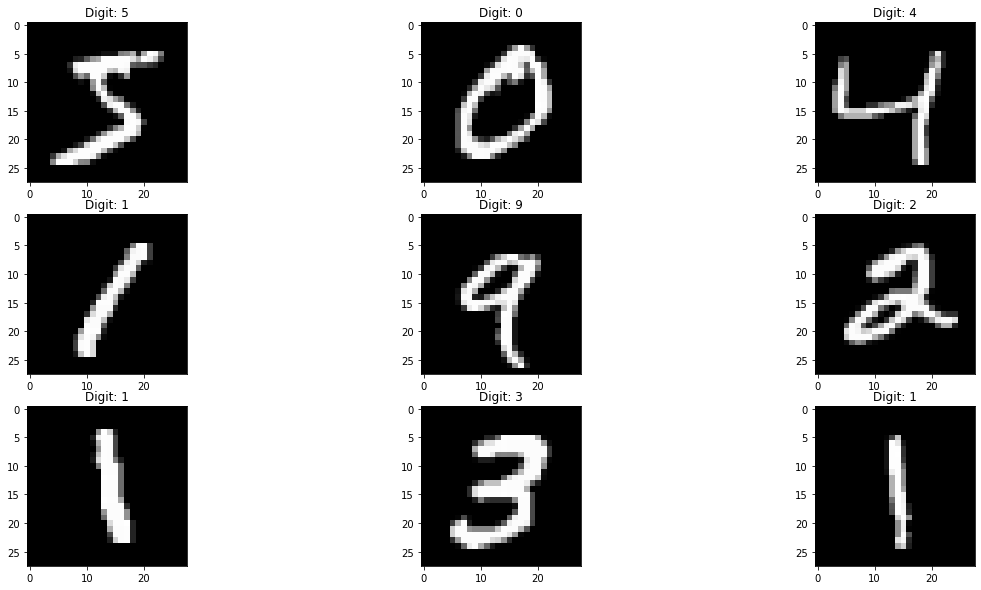

In [8]:
# showing first nine digits
images=x_train[:9]
labels=y_train[:9]
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(2*10, 2*5))
for i in range(9):
  ax=axes[i//3, i%3]
  ax.imshow(images[i],cmap='gray')
  ax.set_title(f'Digit: {labels[i]}')
plt.show()


**Display the DIGIT PIXELS**

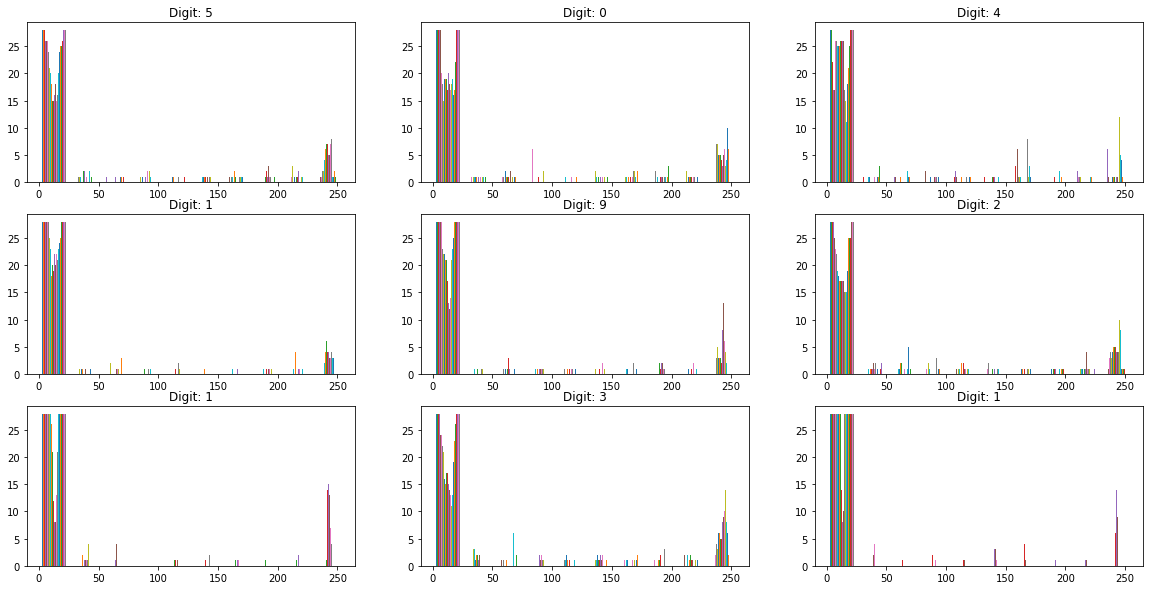

In [9]:
# visualizing the range of pixel values
fig,axes=plt.subplots(3,3,figsize=(2*10, 2*5))
for i in range(9):
  ax=axes[i//3, i%3]
  ax.hist(images[i])
  ax.set_title(f'Digit: {labels[i]}')
plt.show()

the pixel values are between 0 to 255, values from 0 or close to 255 represent the pixel values that compose the digit images.  

** DATA DISTRIBUTION in MNIST dataset (showing number of lables in dataset)**






**Number of lables in training datast**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


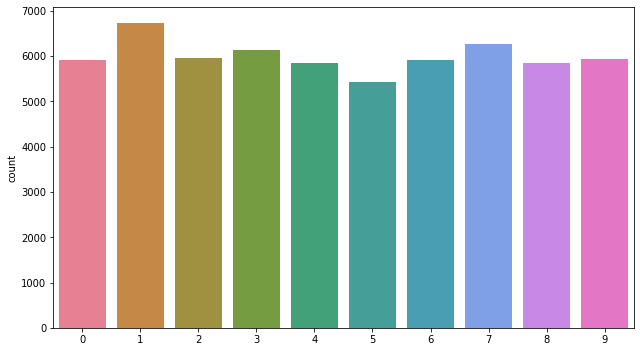

time: 440 ms (started: 2022-05-31 08:55:26 +00:00)


In [ ]:
plt.figure(figsize=(9,5))
plot=sns.countplot(y_train, palette="husl")
plt.xlabel="Digit"
plt.ylabel='Counts'
plt.title='TRAINING LABELS IN MNIST DATASET'
plt.grid(False)
plt.tight_layout()

**Number of lables in test dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


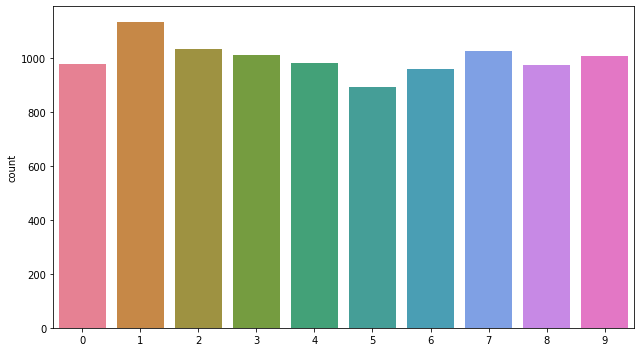

time: 376 ms (started: 2022-05-31 08:55:36 +00:00)


In [ ]:
plt.figure(figsize=(9,5))
plot=sns.countplot(y_test, palette="husl")
plt.xlabel='Digit'
plt.ylabel='Counts'
plt.title='TESTING LABELS IN MNIST DATASET'
plt.grid(False)
plt.tight_layout()

as you can see the digit classes are uniformally distributed across the training and testing sets

**DATA RESHAPING :** 
if we wanna that data be readble from the models and facilitate the training steps, it is better to reshape our data and flatten the 28x28 matrix into a single vector of 784 elements for each sample. 


In [10]:
# reshape training and testing data
fitting_train=x_train.flatten().reshape(60000,784)
print(f'Reshaped training data: \n {fitting_train} \n')
print(f'Shape:  {fitting_train.shape} \n')

fitting_test=x_test.flatten().reshape(10000,784)
print(f'Reshaped testing data: \n {fitting_test} \n')
print(f'Shape: {fitting_test.shape}')


Reshaped training data: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape:  (60000, 784) 

Reshaped testing data: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape: (10000, 784)





### **1. DECISION TREE**

 It is one of the most used and powerful supervised machine learning algorithms for both regression and classification tasks. 
Decision trees are commonly used in operations research and operations management. If, in practice, decisions have to be taken online with no recall under incomplete knowledge, a decision tree should be paralleled by a probability model as a best choice model or online selection model algorithm.Another use of decision trees is as a descriptive means for calculating conditional probabilities.
Advantages and disadvantages
Among decision support tools, decision trees (and influence diagrams) have several advantages.

**Advantages**

Are simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.
Help determine worst, best, and expected values for different scenarios.
Use a white box model. If a given result is provided by a model.
Can be combined with other decision techniques.
The action of more than one decision-maker can be considered.
**Disadvantages of decision trees:**

They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.
They are often relatively inaccurate. Many other predictors perform better with similar data. This can be remedied by replacing a single decision tree with a random forest of decision trees, but a random forest is not as easy to interpret as a single decision tree.
For data including categorical variables with different numbers of levels, information gain in decision trees is biased in favor of those attributes with more levels.
Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.

Here we create a DT model that can be used to predict the class of the target variable by learning simple decision rules inferred during the training phase. 

To predict a class for a specific data point, we start from the root node of the tree. Based on a comparison between the root attribute and the data point attribute we can follow the correct branch and go down jumping to the next node. Each leaf node represents the final class label to be assigned.then, We apply the gini index as impurity measure (probability of a particular variable to be wrongly classified). finally, we select a maximum depth value of the tree  (a measure of how many splits a tree can makes before coming out with a prediction). Usually too high max_depth values could lead to overfitting.








**Finding best depth to achieve the highest accuracy by plotting accuracy and max-depth**
 

Accuracy values: [0.1994, 0.3447, 0.4953, 0.5957, 0.6747, 0.7416, 0.7853, 0.8186, 0.8501, 0.8657]


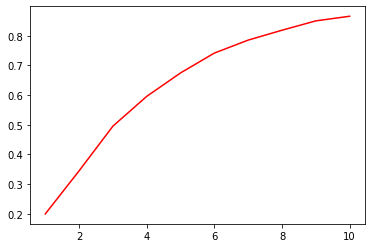

In [11]:
max_depth_range= list(range(1,11)) 
accuracy=[]
for depth in max_depth_range:
  dt_model=DecisionTreeClassifier(max_depth=depth,random_state=0)
  dt_model.fit(fitting_train,y_train)
  score=dt_model.score(fitting_test,y_test)
  accuracy.append(score)
print(f'Accuracy values: {accuracy}')
plt.plot(max_depth_range,accuracy, color='Red')
plt.ylabel='Accuracy'
plt.xlabel='Max Depth'
plt.grid(False)

here we can see that the highest accuracy value is when max_depth is 10 in the range of 1 to 10. i test  with other values but the accuracy of the model is similar to the Max_depth=10. becasue of avoiding overfitting i select the depth of 10.


**TRAINING AND PREDICTION **


In [12]:
# define the model 
DT=DecisionTreeClassifier(max_depth=10)
# fit the model 
DT.fit(fitting_train,y_train)
# prediction of model
pred_dt=DT.predict(fitting_test)




**Evaluation and Performance of the model**
The Scikit-Learn library has many functions for calculating criteria:
These numbers tell us that when a model claims that a photo is 5, it actually says 72.9% of the time and can detect 75% of 5s in total.

Most of the time, these two criteria are combined to create a standard called F1 Score. This criterion is actually the average of Precision and Recall harmonics. The difference between this average and the normal average is that the normal average treats all the same values, while the harmonic average gives more weight to the lower values. This is why the Classifier achieves a high F1 Score when both Precision and Recall have large values.
Of course, note that we do not always want to have a high F1 Score. In some places, only the Precision value is important to us, and sometimes only the Recall value. For example, suppose we created a model to identify suitable videos for children. In such a model, we prefer to skip a lot of videos that have good content (low recall value) but keep only videos that are suitable for children (high precision value). On the other hand, consider a model that has a high Recall, but instead occasionally suggests a few videos with inappropriate content (in such cases, it is better to have people to review the approved videos again). Another example Suppose we created a model to detect a thief in surveillance camera photos. In this model, if Precision is 30% and Recall is 99%, there is no problem. It is true that the guards receive several wrong warnings, but in return, almost all the thieves are arrested.

Unfortunately we can not have both Precision and Recall together. As the Precision increases, the Recall value decreases and vice versa.



In [14]:
print("Precision, Recall and F1score:", "\n",classification_report(y_test,pred_dt))
print()
dt_acc=round(accuracy_score(y_test,pred_dt),3)
print("ACCURACY:", "\n", dt_acc)

Precision, Recall and F1score: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.83      0.83      1010
           4       0.86      0.85      0.85       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.81       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000


ACCURACY: 
 0.866


A better way to evaluate the model is to use the Confusion Matrix. The general idea of this matrix is that it counts the number of times Class A samples are classified as Category B samples. For example, if we want to know the number of times the model confuses 5s with 3s, we refer to the fifth row and the third column of this matrix.

To use this first matrix, we must have a series of conjectures that we can compare with real values.
as you can see in the result,Decision Tree classifiers performs well with our dataset.
Overall the model has good ability of predicting correctly and catching positive instances (precision and recall)
As shown from the confusion matrix diagonal values, digits are mostly predicted well. Nevertheless misclassification occurs for some digits, such as '4' and '7' that have a higher rate of misclassification into '9' or as '5' into '3' and viceversa.

To use this first matrix, we must have a series of conjectures that we can compare with real values. We can make a series of guesses using the test set, but for now, let it remain intact. (Remember that we use the test when our project is finished and ready to launch).

We can use cross_val_pridict instead:
This function works just like cross_val_score except that it returns the guesses made in each folder instead of points. That is, for each sample in the training set, we receive a guess.

Now we can see this matrix using the confusion_matrix function: Each row of this matrix represents a bunch and each column represents a guessing batch. (These numbers may be different for you) The first row of this matrix represents the photos Is 5 (negative category): 53057 numbers were correctly classified as non-5 (true negatives) while 1522 were incorrectly classified as 5 (false positives). The second row shows 5 photos (positive category): 1325 were categorized as non-5 incorrectly (false negatives) and 4096 were categorized correctly as 5 (correct positives)

A classifier with excellent performance will have only true positive and negative values, and the rest of the data will be zero.

This matrix gives us good information, but sometimes we may need a more concise criterion. We can use Precision to see how accurate the guesses are:
precision=TP/(TP+FP)

Here TP stands for True Positive and FP stands for False Positive. Precision is always used with another criterion called Recall, also known as Sensitivity and True Positive Rate. Here FN means False Negative.
Recall=TP/(TP+FN)










[Text(52.5, 0.5, 'True'), Text(0.5, 25.5, 'Prediction')]

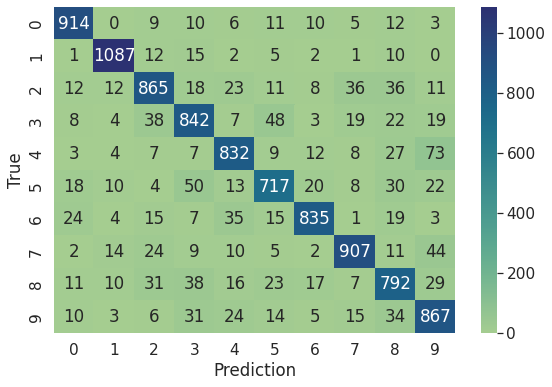

In [15]:
# confusion matrix
CM_DT=confusion_matrix(y_test,pred_dt)
color=sns.color_palette("crest",as_cmap=True)
fig=plt.figure(figsize=(9,6))
plt.title='confusion matrix of DT'
sns.set(font_scale=1.4)
ax=sns.heatmap(CM_DT,annot=True,cmap=color,fmt="d")
ax.set(ylabel='True',xlabel='Prediction')


**2.2 DECISION TREE with *5*-fold cross validation** 

Another inspection can be the usage of the cross-validation technique. It is based on splitting the orginal dataset into multiple subsets and perform the model training/testing steps on these subsets. Here we use a 5-fold cross-validation which splits the data into *k*=5 folds. The model is then trained on *k-1*=4 subsets and evaluated on the remaining subset. The same procedure is repeated *k*=5 times with a different training/testing splitting so that - at the end - each subset is retained once as testing set. 

In [17]:
# concatenate the train test sets and testing set withtogether
fitting=np.concatenate((fitting_train,fitting_test))
labels=np.concatenate((y_train,y_test))
print(f'Features shape: {fitting.shape} \n')
print(f'Labels shape:  {labels.shape}')

Features shape: (70000, 784) 

Labels shape:  (70000,)


In [18]:
# cross-validation 
cv_score_dt=cross_val_score(DT,fitting,labels, cv=5,scoring="accuracy")
cv_score_dt=[round(i,3) for i in cv_score_dt ]
print(f'Perfromance results from CV: \n {cv_score_dt}')

Perfromance results from CV: 
 [0.856, 0.854, 0.848, 0.856, 0.87]


In [19]:
# compute the average of the accuracy values obtained at each cv iteration
cv_acc_dt=round(np.mean(cv_score_dt),3)
print(f'Average Accuracy score from CV: \n {cv_acc_dt}')

Average Accuracy score from CV: 
 0.857


As we can see the DT model shows a good performance. This suggests that the model performs consistent predictions and it fits well the data



### **3. RANDOM FOREST** 
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance. 
The majority voting is performed over the outcome of each estimators to get the final outcome. It is a feasible method to control the over-fitting (common in DT classifiers) and to improve the accuracy of the predictions by averaging the results. This means that the prediction of the ensemble is given as the averaged prediction of the individual classifiers. 

There are different hyperparametrs to take into account when building a Random forest model, as the number of estimators to be used. In general a higher number of trees increases the performance and makes the predictions more stable, even if the computation can be slower  





**3.1 training random forest model with 100 estimators**

In [20]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(fitting_train,y_train)

RandomForestClassifier()

**Random Forest Prediction and its Performance**

In [21]:
pred_rf=rf_model.predict(fitting_test)
print(f'Classification Report \n {classification_report(y_test,pred_rf)}')
rf_acc=round(accuracy_score(y_test,pred_rf),3)
print(f'ACCURACY SCORE: \n {rf_acc}')

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

ACCURACY SCORE: 
 0.969


**Computing confusion matrix for Random Forest method**

[Text(52.5, 0.5, 'True Class'), Text(0.5, 25.5, 'Predicted Class')]

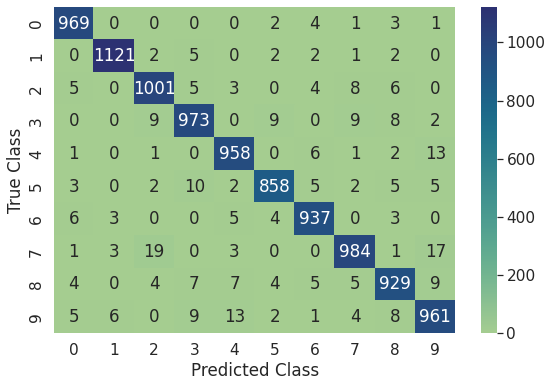

In [22]:
CM_RF=confusion_matrix(y_test,pred_rf)
color=sns.color_palette("crest",as_cmap=True)
fig=plt.figure(figsize=(9,6))
plt.title='RANDOM FOREST CONFUSION MATRIX'
sns.set(font_scale=1.4)
ax=sns.heatmap(CM_RF,annot=True,cmap=color,fmt="d")
ax.set(ylabel='True Class',xlabel='Predicted Class')



as we can see from the resutl of cofnusion matrix the accuracy is improved by using ensemble methods with respect to the usage of a single Decision Tree Classifier. 
all of parameters such as Precision, Recall and F-1 metrics are improved for each of the 10 classes of DT model.


**calcualte the random forest performance with more estimator forexample 500 estimators**

In [23]:
rf_model1=RandomForestClassifier(n_estimators=500)
rf_model1.fit(fitting_train,y_train)

RandomForestClassifier(n_estimators=500)

**prediction and performance of new random forest **

In [24]:
pred1=rf_model1.predict(fitting_test)
print(f'Classification Report \n {classification_report(y_test,pred1)} ')
rf_acc1=round(accuracy_score(y_test,pred1),3)
print(f'ACCURACY SCORE: \n {rf_acc1}')


Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 
ACCURACY SCORE: 
 0.972


the performance is close to the result of random forest with 100 estimators.

as we can see in the above resutls, the performance of random forest is very good. I didnt see any overfitting symbols in the results. So we can rely on esemble methods as highly reliable as classification methods.



### **4. CONVOLUTIONAL NEURAL NETWORK**



Convolutional Neural Network (CNN) is a common machine learning application for visual imagery. 
CNNs are regularized versions of multilayer perceptrons meaning that they represent a good application to avoid overfitting.  



 MODEL ARCHITECTURE DEFINITION 
In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery. CNNs are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps.Counter-intuitively, most convolutional neural networks are not invariant to translation, due to the downsampling operation they apply to the input. They have applications in image and video recognition, recommender systems,image classification, image segmentation, medical image analysis, natural language processing, brain–computer interfaces,and financial time series.
CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "full connectivity" of these networks make them prone to overfitting data. Typical ways of regularization, or preventing overfitting, include: penalizing parameters during training (such as weight decay) or trimming connectivity (skipped connections, dropout, etc.) CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble patterns of increasing complexity using smaller and simpler patterns embossed in their filters. Therefore, on a scale of connectivity and complexity, CNNs are on the lower extreme.

**Archituecutre**
A convolutional neural network consists of an input layer, hidden layers and an output layer. In any feed-forward neural network, any middle layers are called hidden because their inputs and outputs are masked by the activation function and final convolution. In a convolutional neural network, the hidden layers include layers that perform convolutions. Typically this includes a layer that performs a dot product of the convolution kernel with the layer's input matrix. This product is usually the Frobenius inner product, and its activation function is commonly ReLU. As the convolution kernel slides along the input matrix for the layer, the convolution operation generates a feature map, which in turn contributes to the input of the next layer. This is followed by other layers such as pooling layers, fully connected layers, and normalization layers.


Data reshaping: as we do reshaping data for decision tree method we reshapge the initial input array and change it into 4-D array to obtain the required input for CNN 

Data rescaling:we need to transform the pixel values, originally in the range 0-255, into range of 0-1. This make the procedure faster. 

In [25]:
# reshaping data into 4-dimensions 
xtrain=x_train.reshape((60000,28,28,1))    
xtest=x_test.reshape((10000,28,28,1))
print(f'reshaping is: \n {xtrain.shape}')
# rescaling data
xtrain=xtrain / 255
xtest= xtest / 255
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

reshaping is: 
 (60000, 28, 28, 1)


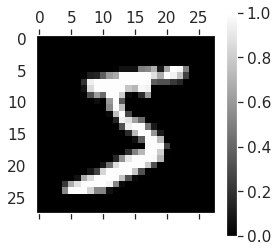

In [28]:
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert images to the array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
	# testing that normalization works correclty or not
plt.matshow(xtrain[0,:,:,0], cmap="gray")
plt.grid(False)
plt.colorbar()
plt.show()

converting the class labels into one-hot encoding vector(converting categorical data into a row vector of dimension 1x10 for each image).

 The vector contains all zeros except for the class that it represents-for which it assumes the value of 1 (binary vector). 

In [29]:
from tensorflow.keras.utils import to_categorical 
print(f'before:  \n Shape {a} {y_train.shape} \n Digit representation {a} {y_train[0]} \n')
ytrain=tf.keras.utils.to_categorical(y_train)
ytest=tf.keras.utils.to_categorical(y_test)
d=u'\u2193'
print(f'after: \n Shape {a} {ytrain.shape} \n Digit representation {d} \n {ytrain[0]}')



BEFORE:  
 Shape → (60000,) 
 Digit representation → 5 

AFTER: 
 Shape → (60000, 10) 
 Digit representation ↓ 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


here we make 3 model of CNN with different archtiecutre and then we will make a comparison between their performances.

building the CNN model 0 with the artchiture of 
1-Two convolutional layers with two different windows size and the ReLU activation function. In this step the input size is reduced to make the process faster and the ReLU function increases non-linearity in the CNN; 
2-one Pooling layerenables to apply a 2x2 window on the feature map and returns a simplified pooled feature map
3-One flattening layer to transofrm the feature map into a single column
4-One additional Dense/fully connected layer that can process the data and in which the error is computed and then backpropagated through the system to improve the prediction. In the last dense/output layer is used a softmax activation function.

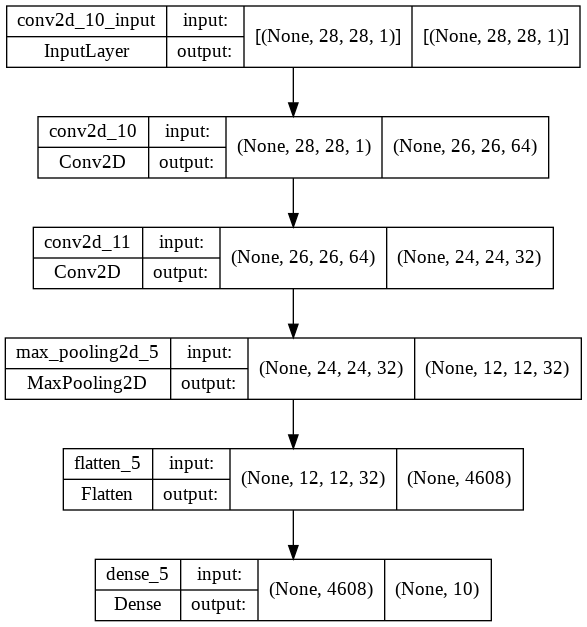

In [37]:
# cnn model zero
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu", input_shape=(28,28,1)))  
model.add(Conv2D(32,(3,3),activation="relu"))                         
model.add(MaxPool2D(2,2))                                             
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)


In [38]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

training cnn model 0 with epoch 25 and batch size 256
for training model we should use from fit() function. number of epochs shows how many times the entire dataset is passed forward and backward through the CNN.

In [39]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=25,batch_size=256)



Epoch 1/25
235/235 [==============================] - 15s 15ms/step - loss: 0.3205 - accuracy: 0.9078 - val_loss: 0.0828 - val_accuracy: 0.9753
Epoch 2/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0730 - accuracy: 0.9782 - val_loss: 0.0565 - val_accuracy: 0.9820
Epoch 3/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0478 - val_accuracy: 0.9846
Epoch 4/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0542 - val_accuracy: 0.9836
Epoch 5/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0429 - val_accuracy: 0.9855
Epoch 6/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.0459 - val_accuracy: 0.9849
Epoch 7/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0449 - val_accuracy: 0.986

evaluation of Cnn model 0



In [40]:
score=model.evaluate(xtest,ytest)
cnn0_acc=round(score[1],3)
cnn0_loss=round(score[0])
print(f'loss MODEL CNN 0:  {cnn0_loss}')
print(f'accuracy MODEL CNN 0: {cnn0_acc}')



313/313 [==============================] - 1s 4ms/step - loss: 0.0822 - accuracy: 0.9860
loss MODEL CNN 0:  0
accuracy MODEL CNN 0: 0.986


**Plotting model loss and its accuracy for every epochs**

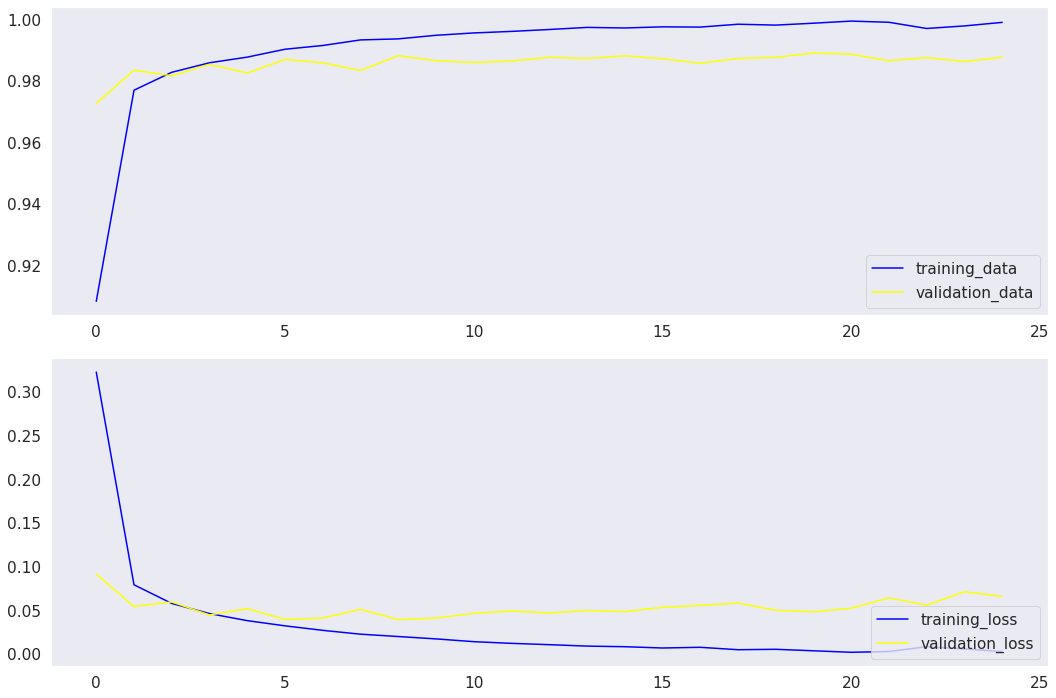

time: 1.04 s (started: 2022-05-31 09:41:36 +00:00)


In [ ]:
fig=plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(history.history["accuracy"],color='blue')
plt.plot(history.history["val_accuracy"],color='yellow')
plt.ylabel="Accuracy"
plt.xlabel="Epoch"
plt.legend(["training_data", "validation_data"], loc="lower right")
plt.title='Accuracy trend: training vs validation set'
plt.grid(False)
plt.subplot(2,1,2)
plt.plot(history.history["loss"],color='blue')
plt.plot(history.history["val_loss"],color= 'yellow')
plt.ylabel="Loss"
plt.xlabel="Epoch"
plt.legend([ "training_loss","validation_loss"],loc="lower right")
plt.title='Loss trend: training vs validation set'
plt.tight_layout()
plt.grid(False)
plt.show()

as we can see accuracy of CNN model 0 is better than DT and RF. However, we can observe that  the accuracy is very high during the training step, while it decreases during validation phase.   The second panel shows the cross-entropy loss function values. Here, the validation loss increases as the training loss decreases. Both this observations suggest that the model performs extremely well on the training data but it does not do the same on the validation set: the model overfits the training data and it is not able to fully generalize.


Builidng CNN model 1 : here we will add the padding, a new dense layer with 100 nodes and we will increase also the kernel size


In [41]:

model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) 
model1.add(MaxPool2D(pool_size=2))
model1.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')) 
model1.add(MaxPool2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu')) 
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])
history1=model1.fit(xtrain, ytrain,validation_data=(xtest,ytest),epochs=25,batch_size=256)


Epoch 1/25
235/235 [==============================] - 5s 15ms/step - loss: 0.2650 - accuracy: 0.9220 - val_loss: 0.0609 - val_accuracy: 0.9813
Epoch 2/25
235/235 [==============================] - 3s 12ms/step - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 3/25
235/235 [==============================] - 3s 12ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 4/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0277 - val_accuracy: 0.9905
Epoch 5/25
235/235 [==============================] - 3s 15ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0286 - val_accuracy: 0.9909
Epoch 6/25
235/235 [==============================] - 4s 17ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0262 - val_accuracy: 0.9904
Epoch 7/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0289 - val_accuracy: 0.9900

**performance of Cnn model 1**

In [42]:
score1=model1.evaluate(xtest,ytest)
cnn1_acc=round(score1[1],3)
cnn1_loss=round(score[0],3)
print(f'Test loss: {cnn1_loss}')
print(f'Test accuracy: {cnn1_acc}')


313/313 [==============================] - 2s 5ms/step - loss: 0.0330 - accuracy: 0.9936
Test loss: 0.082
Test accuracy: 0.994


plotting CNN model 1 accuracy and its loss for every epochs

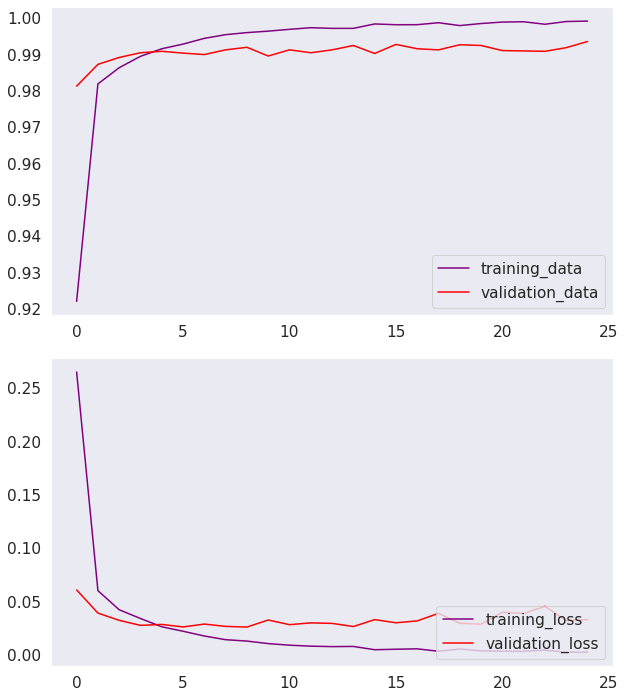

In [43]:
fig=plt.figure(figsize=(9,10))
plt.subplot(2,1,1)
plt.plot(history1.history["accuracy"], color='Purple')
plt.plot(history1.history["val_accuracy"], color='Red')
plt.ylabel="Accuracy"
plt.xlabel="Epoch"
plt.legend(["training_data", "validation_data"], loc="lower right")
plt.title='Accuracy trend: training vs validation set'
plt.grid(False)
plt.subplot(2,1,2)
plt.plot(history1.history["loss"], color='Purple')
plt.plot(history1.history["val_loss"], color='Red')
plt.ylabel="Loss"
plt.xlabel="Epoch"
plt.legend([ "training_loss", "validation_loss"], loc="lower right")
plt.title='Loss trend: training vs validation set'
plt.tight_layout()
plt.grid(False)
plt.show()


In he CNN model 1 we can see that the plots show that there is an increase of the loss on the validation set as the loss on the training set decreases and the model does not guarantee generalization as well. I think the model architecture needs to be modified further to avoid overfitting and to obtain a more high-quality and general model.

Builidng CNN model 2 to performe more generally in comparision of the two previous model we will evaluate this new model for its performance and accuracy and generality.

changing in the architure will be in convolutional, pooling and dense layers, also we add the dropout layer which randomly sets input units to 0 toward a specific layer,  with a frequency that is specified from the dropout rate parameter. If the unit signal is set to 0, it will be ignored. This step introduces regularization and  helps in preventing overfitting. 






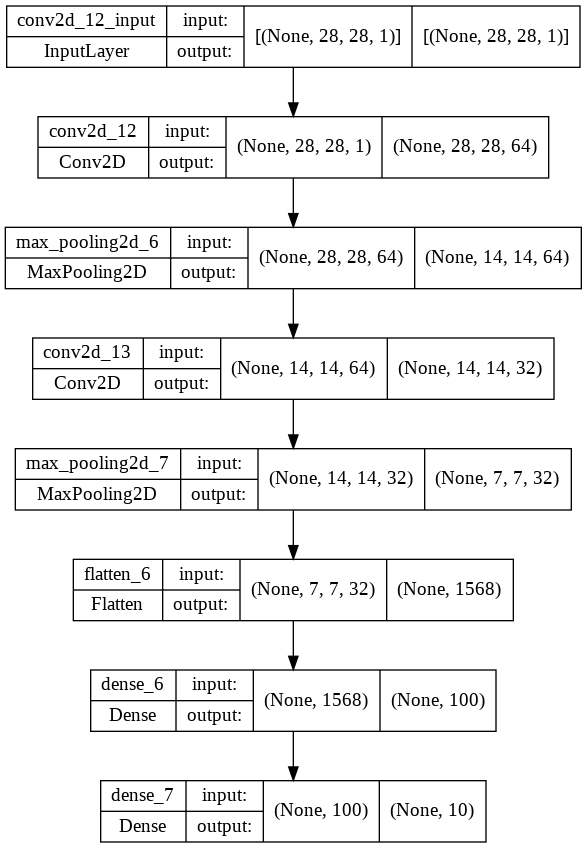

In [44]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(MaxPool2D(pool_size=2))
model2.add(Dropout(0.3)) 
model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Dropout(0.3))  
model2.add(Flatten())
model2.add(Dropout(0.5))  
model2.add(Dense(10, activation='softmax'))
from keras.utils.vis_utils import plot_model
plot_model(model1,show_shapes=True, show_layer_names=True)

**compile the build model**

In [45]:
model2.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])

**traing the CNN model 2**

In [46]:
 epochs = 25
batch_size = 256
history2 = model2.fit(x=xtrain,y=ytrain,batch_size=batch_size, epochs=epochs,validation_data=(xtest,ytest))

Epoch 1/25
235/235 [==============================] - 5s 16ms/step - loss: 0.6159 - accuracy: 0.8036 - val_loss: 0.1371 - val_accuracy: 0.9602
Epoch 2/25
235/235 [==============================] - 3s 13ms/step - loss: 0.1871 - accuracy: 0.9430 - val_loss: 0.0840 - val_accuracy: 0.9763
Epoch 3/25
235/235 [==============================] - 3s 11ms/step - loss: 0.1433 - accuracy: 0.9560 - val_loss: 0.0668 - val_accuracy: 0.9810
Epoch 4/25
235/235 [==============================] - 3s 11ms/step - loss: 0.1202 - accuracy: 0.9629 - val_loss: 0.0557 - val_accuracy: 0.9836
Epoch 5/25
235/235 [==============================] - 3s 11ms/step - loss: 0.1095 - accuracy: 0.9666 - val_loss: 0.0510 - val_accuracy: 0.9839
Epoch 6/25
235/235 [==============================] - 3s 11ms/step - loss: 0.1002 - accuracy: 0.9689 - val_loss: 0.0454 - val_accuracy: 0.9859
Epoch 7/25
235/235 [==============================] - 3s 12ms/step - loss: 0.0933 - accuracy: 0.9710 - val_loss: 0.0421 - val_accuracy: 0.9865

**check the performance of CNN model 2**

In [47]:
score2=model2.evaluate(xtest,ytest)
cnn2_acc=round(score2[1],3)
cnn2_loss=round(score[0],3)
print(f'Test loss: {cnn2_acc}')
print(f'Test accuracy: {cnn2_loss}')


313/313 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9903
Test loss: 0.99
Test accuracy: 0.082


**plotting the model accuracy and its loss per model epochs**

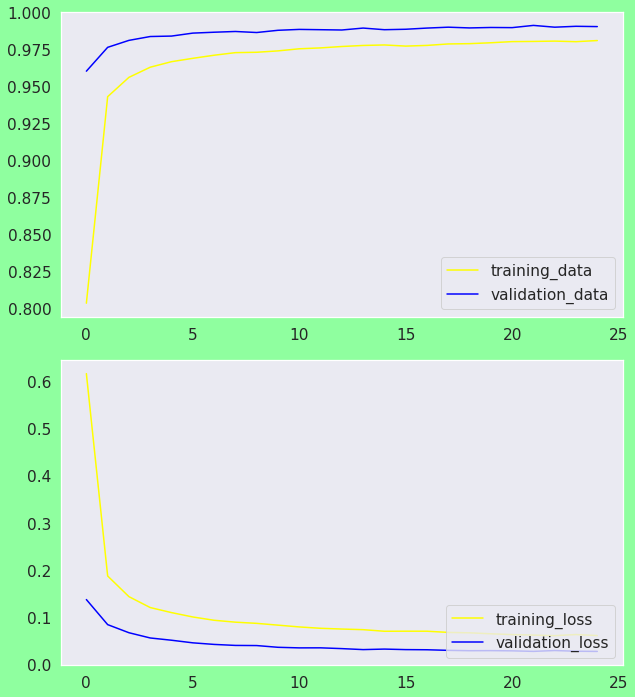

In [52]:
fig=plt.figure(figsize=(9,10))
plt.subplot(2,1,1)
plt.plot(history2.history["accuracy"],color='Yellow')
fig.patch.set_facecolor('xkcd:mint green')
plt.plot(history2.history["val_accuracy"],color='Blue')
plt.ylabel="Accuracy"
plt.xlabel="Epoch"
plt.legend(["training_data","validation_data"],loc="lower right")
plt.grid(False)
plt.subplot(2,1,2)
plt.plot(history2.history["loss"],color='Yellow')
plt.plot(history2.history["val_loss"],color='Blue')
plt.ylabel="Loss"
plt.xlabel="Epoch"
plt.legend([ "training_loss", "validation_loss"],loc="lower right")
plt.tight_layout()
plt.grid(False)
plt.show()

as we can see the CNN model2 has a very high performance and low level of overfitting as well. by changing the archtituecure we could regularizing the model and keeping a high level performance over all the previous trained models. 



**comparision of all of used methods: DT,RF, CNN MODEL0,1,2**

In [59]:
models=['DT','DT_CV','RF','RF1','CNN0','CNN1','CNN2']
accuracies=[dt_acc,cv_acc_dt,rf_acc,rf_acc1,cnn0_acc,cnn1_acc, cnn2_acc]
accuracy_df=pd.DataFrame(models, columns=['MODEL'])
accuracy_df['model_accuracy']=accuracies
accuracy_df

,MODEL,model_accuracy
0,DT,0.866
1,DT_CV,0.857
2,RF,0.969
3,RF1,0.972
4,CNN0,0.986
5,CNN1,0.994
6,CNN2,0.990


[]

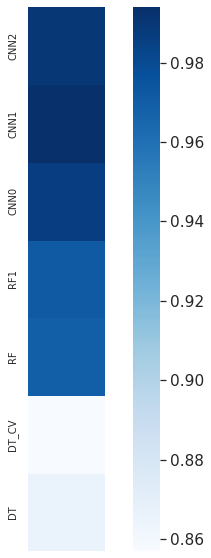

In [60]:
data1=np.asarray(accuracy_df['model_accuracy'])
fig,ax=plt.subplots(figsize=(10,10))
from matplotlib import transforms
data2=data1.reshape(data1.shape[0],1)
sns.heatmap(data2,square=True, cmap='Blues')
ax.invert_yaxis()
ax.set_yticklabels(models, fontsize=10)
ax.set_xticklabels([])